In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('AirPassengers.csv')

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# converting data to datetime
data['Month'] = pd.to_datetime(data['Month'])

In [5]:
data.index = data['Month'] # change the month col to index
del data['Month'] #deleted existing col

In [6]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

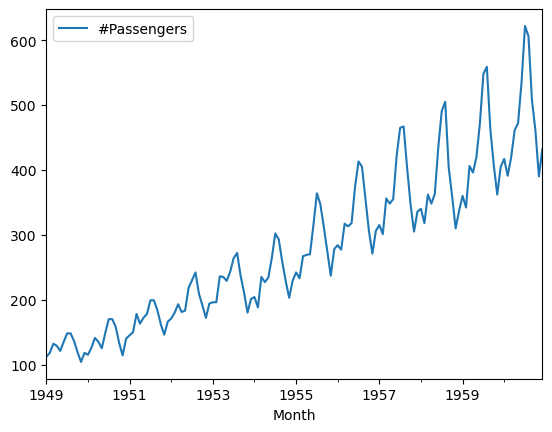

In [8]:
# Plotting
data.plot()

In [9]:
# has an upward trend, seasonality, cyclicity

#### trend: a pattern when there is a long time increase or decrease in the data.
#### Seasonality pattern happens in equal intervals based on parameters like week, month or a year.
#### Cyclic pattern showcases the rise and fall in the data that are not fixed with respect to a specific frequ seasonal pattern.

## Check if stationary

to find the stationarity in data, we will use a statistical Augmented Dickey Fuller test

Two hypothesis:

1) null hypothesis
2) Alternate Hypothesis

To reject the null hypotheses, the following must be true:

1. If the p-value after the adfuller test is greater than 0.05, we fail to reject the hypotheses.

2. If the p-value is less than 0.05, we can reject the null hypotheses and assume that the time series is stationary.

h0- data is not stationary

h1 - data is stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(data['#Passengers'])

In [12]:
print(result)

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [13]:
if (result[1]>0.05):
    print("The data is not stationary")
else:
    print("The data is stationary")

The data is not stationary


### seasonal decompose : It plots the components of the time series data

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

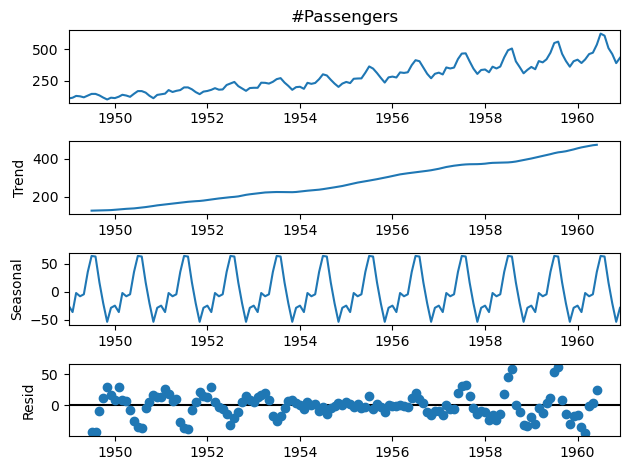

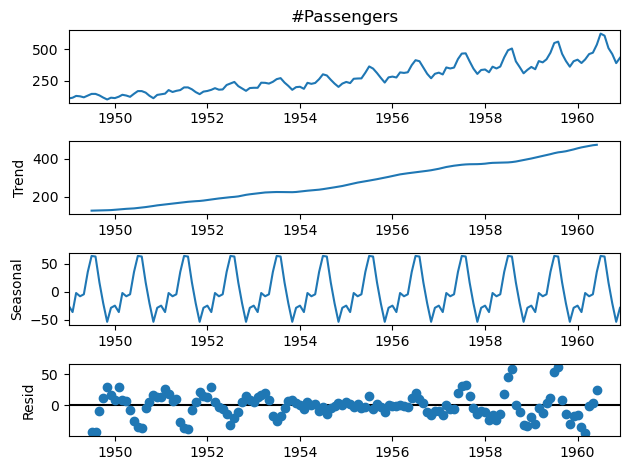

In [15]:
decomposition = seasonal_decompose(data["#Passengers"])
decomposition.plot()

*Original Time Series

*Trend Component

*Seasonal Component

*Residual Component: The residual component represents the remaining variability in the data after removing the trend and seasonal components. It is essentially the "noise" or unexplained part of the time series.

### ROLLING STATISTICS:

Rolling statistics is a very useful operation for time series data. Rolling mean creats a rolling window with a specified size and performace calculation on the data in this window which ofcourse rolls through the data. Rolling stats also helps us to plot the mean and the standard deviation

In [16]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

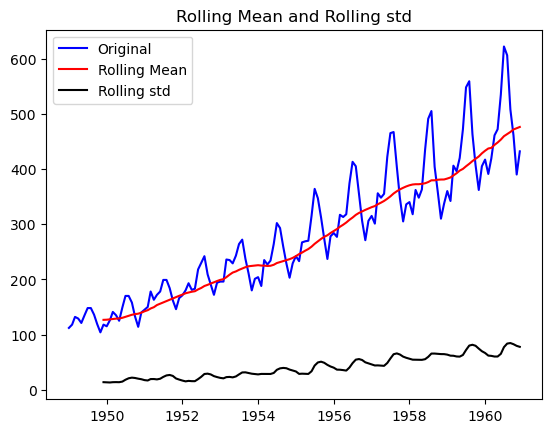

In [17]:
plt.plot(data, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

In [18]:
# std & mean varies over time so apply transformation

## Transformation

In [19]:
first_log = np.log(data)
first_log = first_log.dropna()

In [20]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

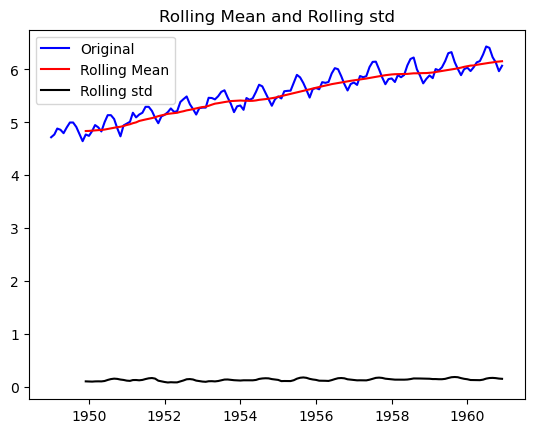

In [21]:
plt.plot(first_log, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

In [22]:
# std is fixed but mean varies over time so apply transformation

In [23]:
new_data = first_log - mean_log
new_data = new_data.dropna()

In [24]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

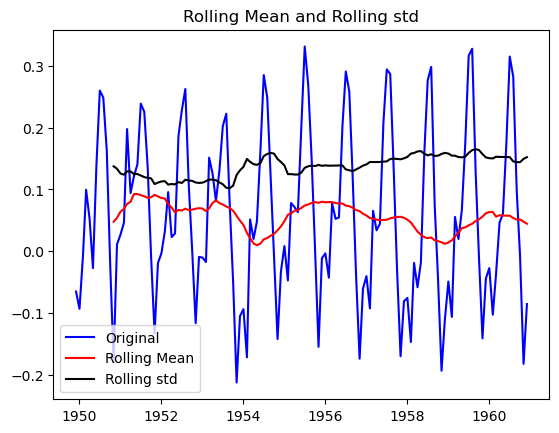

In [25]:
plt.plot(new_data, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

ARIMA model is the combination of Autoregressive(AR), Integrated (I), and Moving Average (MA) models.

Here, p, d and q are the order of AR, order of differencing and order of MA respectively. We have already calculated these values using the auto_arima, or we can deduce these values using the ACF and PCF

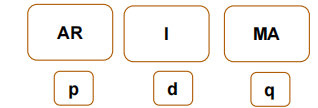

### Finding the values of p,d,q

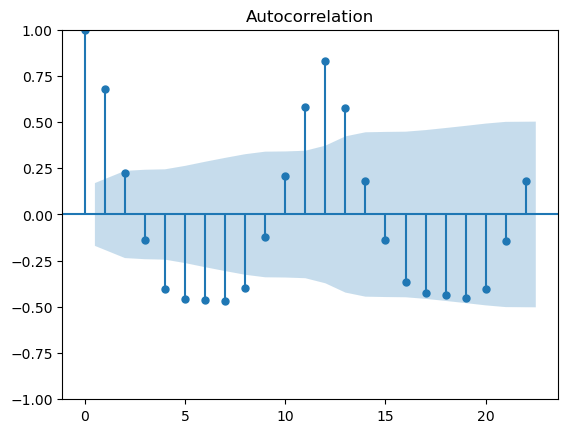

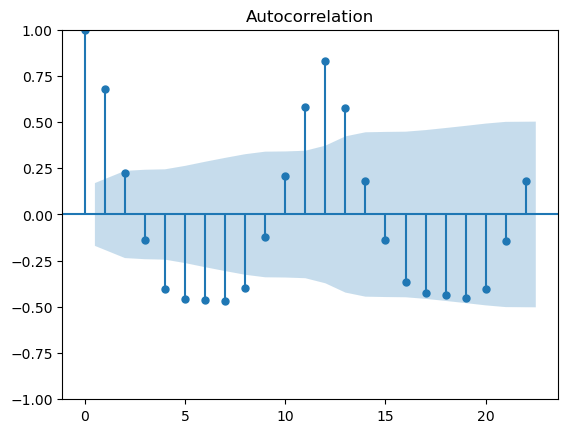

In [26]:
# Autocorrelation
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_data.dropna()) #--> value of q

D:\Anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


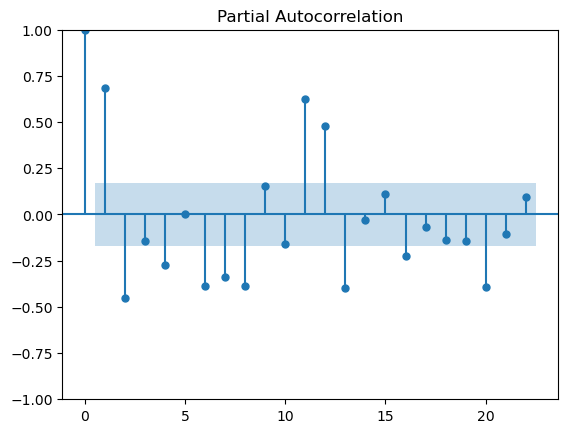

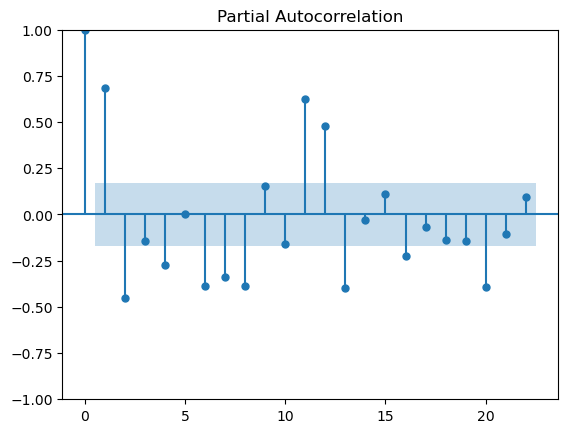

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_data.dropna())  #---------> value of p

In [28]:
# p,q = 1
# d = 1/2

## Splitting into Training & Test Data

In [29]:
train = new_data.iloc[:120]
test = new_data.iloc[121:]

In [30]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [31]:
test

,#Passengers
Month,
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363
1960-09-01,0.098235


### ARIMA

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
model = ARIMA(train, order=(1,1,2))
model_fit = model.fit()

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

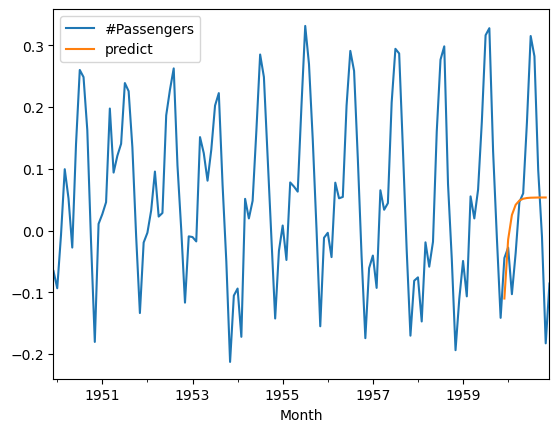

In [34]:
new_data['predict'] = model_fit.predict(start = len(train), end = len(train) + len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

As you can see, the predictions are way off the actual values from the test set. Therefore, we canmove to the seasonal ARIMA model for our forecasting

In [35]:
!pip install pmdarima

In [36]:
# Auto Arima
from pmdarima import auto_arima
order = auto_arima(new_data["#Passengers"],trace=True)
order.summary()
# The auto_arima model searches the best order for the model that has the lowest AIC value.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.471, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=0.29 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-281.505, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 149.632
Date:                Sat, 06 Jan 2024   AIC                           -285.263
Time:                        22:36:04   BIC                           -265.031
Sample:                    12-01-1949   HQIC                          -277.042
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0258      0.006      4.164      0.000       0.014       0.038
ar.L1          0.7863      0.155      5.081      0.000       0.483       1.090
ar.L2          0.2893      0.204      1.419      0.156      -0.110       0.689
ar.L3         -0.5326      0.129     -4.139      0.000      -0.785      -0.280
ma.L1          0.0982      0.121      0.814      0.416      -0.138       0.335
ma.L2         -0.7531      0.089     -8.496      0.000      -0.927      -0.579
sigma2         0.0061      0.001      5.762      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 4.41
Prob(Q):                              0.58   Prob(JB):                         0.11
Heteroskedasticity (H):               1.06   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
model = ARIMA(train,order=(3,0,2))
model_fit = model.fit()

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

<Axes: xlabel='Month'>

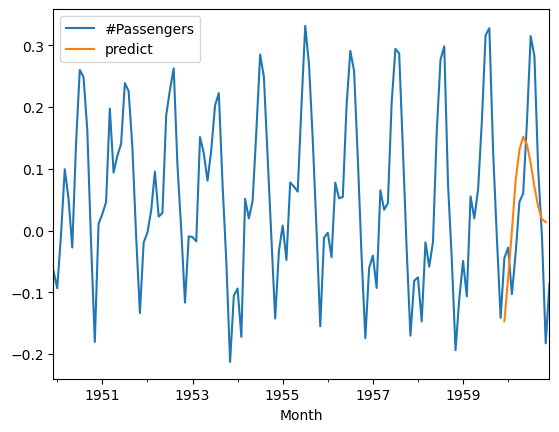

In [38]:
new_data["predict"] = model_fit.predict(start = len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

In the seasonal ARIMA model, we have to specify the seasonal order as well. The seasonal order
remains the same as the ARIMA order, and we can add the periodic order in the seasonal order
according to the periodicity.

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,12))
model=model.fit()

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starti

<Axes: xlabel='Month'>

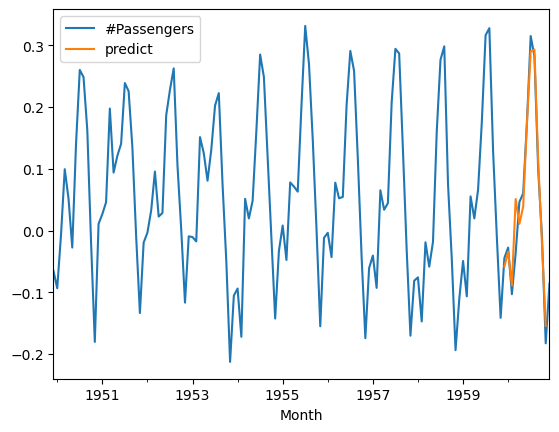

In [41]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

Here, we can see the predicted values on the test set are more accurate than the ARIMA model. Therefore we have successfully created a Time series forecast model. Now we will use this model to forecast the time series.

## Forecasting

<Axes: xlabel='Month'>

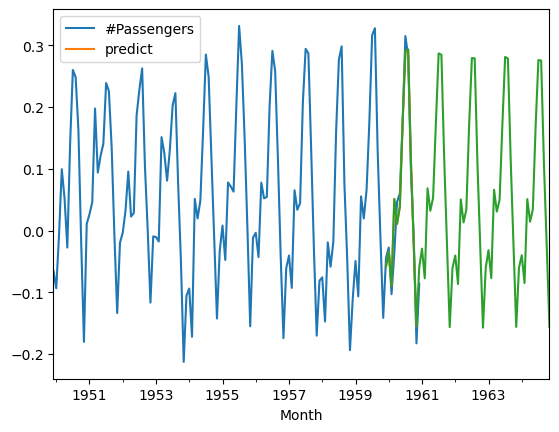

In [42]:
forecast = model.forecast(steps=60) #for predicting future (5 yrs)
new_data.plot()
forecast.plot()

We had trained the model on the new_data  values, therefore the predictions are aligned to the same. We can train the model with the original dataset, and add the order of differencing manually and get the predictions on the actual values.